In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part A

In [ ]:
fraud_df = pd.read_csv('creditcard.csv')
fraud_df

In [ ]:
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check for null values

In [ ]:
fraud_df.isnull().values.any()

False

Review statistical properties of features

In [ ]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(fraud_df['Class'].value_counts()[0]/len(fraud_df) * 100,2), '% of the dataset')
print('Frauds', round(fraud_df['Class'].value_counts()[1]/len(fraud_df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


 By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. 

C:\Users\duygu\AppData\Local\Temp\ipykernel_15648\2785314756.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
C:\Users\duygu\AppData\Local\Temp\ipykernel_15648\2785314756.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


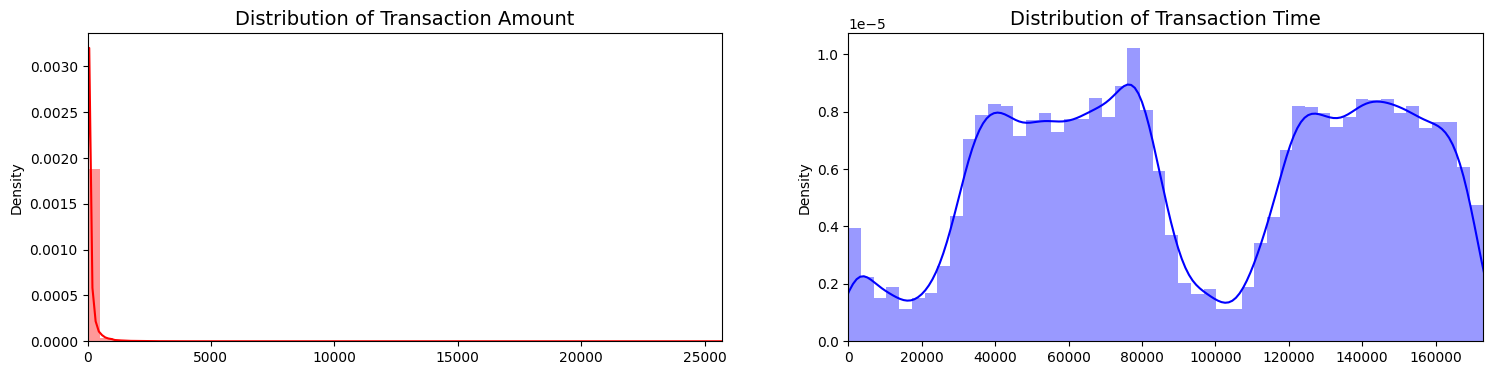

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = fraud_df['Amount'].values
time_val = fraud_df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

According to the main page of the Credit Fraud dataset, V1, V2,...., V28 features were obtained as a result of PCA. Therefore, there is no need to standardize them. However, Time and Amount column are not scaled. Let's scale them

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

fraud_df['Amount'] = std_scaler.fit_transform(fraud_df['Amount'].values.reshape(-1,1))
fraud_df['Time'] = std_scaler.fit_transform(fraud_df['Time'].values.reshape(-1,1))


In [ ]:
fraud_df['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [ ]:
X = fraud_df.drop(columns = 'Class', axis=1)
y = fraud_df['Class'].astype(float)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

reg = linear_model.LinearRegression()

Split train and test data by stratifying because dataset is imbalanced in terms of fraud and non-fraud.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=1)

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test_pred = reg.predict(X_test).round()
test_data_accuracy = accuracy_score(y_test_pred, y_test)
print(f'Test data accuracy is {test_data_accuracy}')

Test data accuracy is 0.9990402958697612


## Part B 

In [ ]:
insurance_df = pd.read_csv('insurance.csv')

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_df.shape

(1338, 7)

Look at percentiless, mean, min and max values of numerical data

In [ ]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_df.isnull().values.any()

False

Scale age and bmi variables. Children count is a discrete variable, so don't scale it.

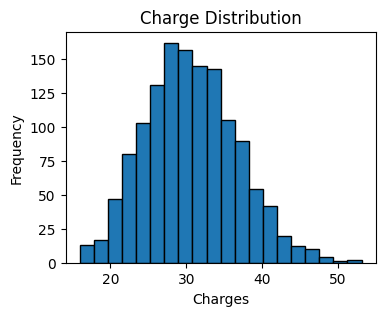

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(insurance_df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

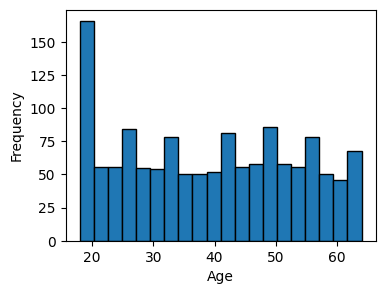

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(insurance_df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Scale bmi and age values with robust scalar, because age is not normally distributed.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
data_scaled = scaler.fit_transform(insurance_df[['bmi', 'age']])


In [ ]:
data_scaled

array([[-0.29770765, -0.83333333],
       [ 0.40130991, -0.875     ],
       [ 0.30961596, -0.45833333],
       ...,
       [ 0.76808574, -0.875     ],
       [-0.54778208, -0.75      ],
       [-0.15838047,  0.91666667]])

In [ ]:
insurance_df[['bmi', 'age']] = data_scaled

The relationship between smoking and charges

<Axes: title={'center': 'Box plot for charges'}, xlabel='charges', ylabel='smoker'>

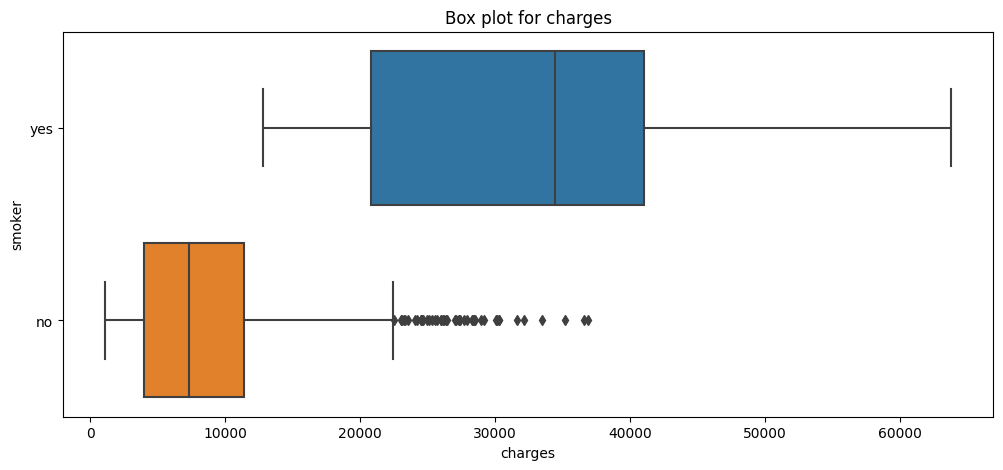

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges")
sns.boxplot(y="smoker", x="charges", data =  insurance_df, orient="h")

Smoking has a greater effect on insurance charges.

In [ ]:
X = insurance_df.drop(columns='charges', axis=1)
y = insurance_df['charges']


We have to apply encoding in the dataset as there are categorical values present. 
for 'sex' and 'smoker' column we will apply Label Encoding as there are only 2 catagories. 
for 'region' we will apply OneHot Encoding as there are more than 2 catagories. 

In [ ]:
# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])
X.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])

In [ ]:
# OneHot Encoding:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 0.0, ..., -0.2977076510866329, 0, 1],
       [0.0, 0.0, 1.0, ..., 0.4013099136647817, 1, 0],
       [0.0, 0.0, 1.0, ..., 0.3096159571300984, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.7680857398035132, 0, 0],
       [0.0, 0.0, 0.0, ..., -0.5477820779994043, 0, 0],
       [0.0, 1.0, 0.0, ..., -0.1583804703780885, 0, 1]], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Because the target variable is a continous value, calculate accuracy with score() method.

In [ ]:
print('Accuracy: ',model.score(X_test, y_test))

Accuracy:  0.7909180545263621
